In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from tabulate import tabulate
import yfinance as yf
%matplotlib inline

ticker= "tsla"
stock_data = yf.download(ticker, start="2016-01-04", end="2022-10-26")

[*********************100%***********************]  1 of 1 completed


In [4]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,15.381333,15.425333,14.600000,14.894000,14.894000,102406500
2016-01-05,15.090667,15.126000,14.666667,14.895333,14.895333,47802000
2016-01-06,14.666667,14.670000,14.398667,14.602667,14.602667,56686500
2016-01-07,14.279333,14.562667,14.244667,14.376667,14.376667,53314500
2016-01-08,14.524000,14.696000,14.051333,14.066667,14.066667,54421500


<AxesSubplot:xlabel='Date'>

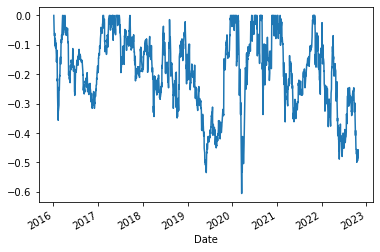

In [5]:
daily_close_pct_change = stock_data['Adj Close'].pct_change()
wealth_index = 1000 * (1 + daily_close_pct_change).cumprod()
previous_peaks = wealth_index.cummax()
drawdown = (wealth_index - previous_peaks) / previous_peaks
drawdown.plot()

In [6]:
daily_close_pct_change.sort_values(inplace=True, ascending=True)

VaR_90 = daily_close_pct_change.quantile(0.1)
VaR_95 = daily_close_pct_change.quantile(0.05)
VaR_99 = daily_close_pct_change.quantile(0.01)

print(tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers=['Confidence Level', 'Value at Risk']))

Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0361466
95%                      -0.0523259
99%                      -0.0906607


In [7]:
CVaR_90 = daily_close_pct_change[daily_close_pct_change <= VaR_90].mean()
CVaR_95 = daily_close_pct_change[daily_close_pct_change <= VaR_95].mean()
CVaR_99 = daily_close_pct_change[daily_close_pct_change <= VaR_99].mean()

print(tabulate([['90%', CVaR_90], ['95%', CVaR_95], ['99%', CVaR_99]], headers=['Confidence Level', 'Conditional Value at Risk (Expected Loss)']))

Confidence Level      Conditional Value at Risk (Expected Loss)
------------------  -------------------------------------------
90%                                                  -0.0629948
95%                                                  -0.0821725
99%                                                  -0.131365
